In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**ACTIVIDAD 1:** Por favor, resume en una sola celda todas las funciones que aplicaste al DataFrame inicial y que concluya con la creación de un nuevo DataFrame para continuar con nuestro trabajo. 

 

Se pide sintetizar las características principales del conjunto de datos que estas analizando, aplicando la siguiente secuencia de funciones de un proceso EDA arriba mencionadas. 

In [3]:
#En resumen de la actividad anterior tenemos
url1 = "https://raw.githubusercontent.com/HumbertoMezaRuiz/FisicaComputacional1/main/Actividad1/diarios.txt"#Definimos este link para usar el texo desde ahi

encabezado = ['Fecha','Precipit','Evap','Tmax','Tmin']#Definimos aqui los encabezados para tener mas orden al definir el df

#Ahora definimos nuestro df, donde como archivo pondremos el link url1 y en names, los encabezado definidos previamente
df_dist = pd.read_csv(url1, names=encabezado, encoding='cp1251', sep='\s+', skiprows=19, skipfooter=2, header=None, engine='python')

df_work0 = df_dist.copy()     #Hacemos una copia de nuestros datos para manipularlos sin miedo a perderlos

str_Nulo = 'Nulo'    #Aqui pondremos lo que querramos quitar, es decir, en mis datos hay datos que dicen 'nulos'

df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)        #Reemplazamos todos los nulos, en este caso, quedara en blanco

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precipit', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

df_work2 = df_work1.copy() #hacemos otra copia para hacer otro cambio

df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy() #Le decimos a python que esa columna son fehcas y le decimos que el primer numero son los dias

df_work2['Año'] = df_work2['Fecha'].dt.year  #Vamos a crear una columna con el año de las fechas

df_work2['Mes'] = df_work2['Fecha'].dt.month #y otras con el mes
 
############################################################################################################################################
df_meteo = df_work2.copy()# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos.
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6898 entries, 0 to 6897
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     6898 non-null   datetime64[ns]
 1   Precipit  6774 non-null   float64       
 2   Evap      823 non-null    float64       
 3   Tmax      6818 non-null   float64       
 4   Tmin      6812 non-null   float64       
 5   Año       6898 non-null   int64         
 6   Mes       6898 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 377.4 KB
       Fecha  Precipit  Evap  Tmax  Tmin   Año  Mes
0 1973-03-01       0.0   NaN  29.0  12.0  1973    3
1 1973-03-02       0.0   NaN  30.0  12.0  1973    3
2 1973-03-03       0.0   NaN  29.0   9.0  1973    3
3 1973-03-04       0.0   NaN  28.0   8.0  1973    3
4 1973-03-05       0.0   NaN  28.0   7.0  1973    3
          Fecha  Precipit  Evap  Tmax  Tmin   Año  Mes
6893 2016-03-26       0.0   NaN  30.0  11.

In [4]:
#Para cambiar las variables de la columna mes, y en vez de ser valores numéricos (1-12) sean nombres hacemos
df_meteo.drop('Mes', axis=1, inplace=True)
df_meteo['Mes'] = df_meteo['Fecha'].dt.strftime('%b')
df_meteo.info()
print(df_meteo.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6898 entries, 0 to 6897
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     6898 non-null   datetime64[ns]
 1   Precipit  6774 non-null   float64       
 2   Evap      823 non-null    float64       
 3   Tmax      6818 non-null   float64       
 4   Tmin      6812 non-null   float64       
 5   Año       6898 non-null   int64         
 6   Mes       6898 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 377.4+ KB
       Fecha  Precipit  Evap  Tmax  Tmin   Año  Mes
0 1973-03-01       0.0   NaN  29.0  12.0  1973  Mar
1 1973-03-02       0.0   NaN  30.0  12.0  1973  Mar
2 1973-03-03       0.0   NaN  29.0   9.0  1973  Mar
3 1973-03-04       0.0   NaN  28.0   8.0  1973  Mar
4 1973-03-05       0.0   NaN  28.0   7.0  1973  Mar


**ACTIVIDAD 2** : Crear Histogramas de las variables de Precipitación, Evaporación, Temperaturas Máxima y Mínima de el conjunto de datos que se están analizando (Función: sns.histplot()). Complementar en su caso con las gráficas de la función de densidad de probabilidad correspondiente (Función: sns.kdeplot())

Para la precipitación tenemos:

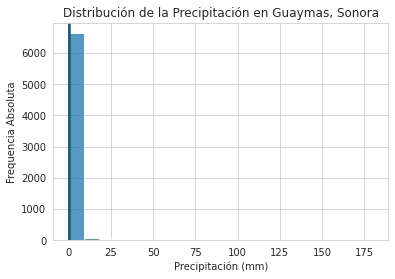

In [22]:
sns.set_style("whitegrid") #Estilo de la gráfica a utilizar, en este caso, whitegrid es: fondo blanco y cuadricula

Precipit_med = df_meteo.Precipit.median() #La mediana de la precipitación
Precipit_prom = df_meteo.Precipit.mean() #El promedio de la precipitación

sns.histplot(data=df_meteo, x='Precipit', bins=20); #Este comando es para los histogramas, tenemos el dataframe, y la columna que usará el eje x

plt.axvline(x = Precipit_med, color = 'b', label = 'm') #Aquí estamos haciendo una línea vertical para el valor de la mediana
plt.axvline(x = Precipit_prom, color = 'g', label = 'x') #Aquí otra para el valor promedio

plt.xlabel('Precipitación (mm)') #Etiquetando al eje x
plt.ylabel('Frequencia Absoluta') #Etiquetando al eje y
plt.title('Distribución de la Precipitación en Guaymas, Sonora') #Titular

plt.show() #Ploteo

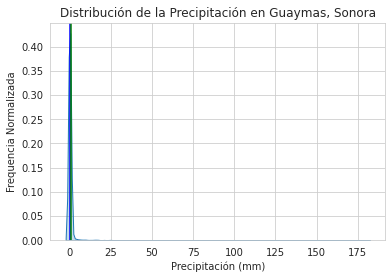

In [25]:
sns.set_style("whitegrid")

sns.kdeplot(df_meteo.Precipit, fill=True); #gráfica de la función de densidad de probabilidad.
plt.axvline(Precipit_med, color = 'b'); 
plt.axvline(Precipit_prom, color = 'g');

plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Precipitación en Guaymas, Sonora')

plt.show()

Para la evaporación tenemos:

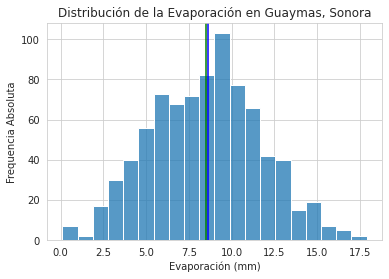

In [26]:
sns.set_style("whitegrid") #Estilo de la gráfica a utilizar, en este caso, whitegrid es: fondo blanco y cuadricula

Evap_med = df_meteo.Evap.median() #La mediana de la evaporación
Evap_prom = df_meteo.Evap.mean() #El promedio de la evaporación

sns.histplot(data=df_meteo, x='Evap', bins=20); #Este comando es para los histogramas, tenemos el dataframe, y la columna que usará el eje x

plt.axvline(x = Evap_med, color = 'b', label = 'm') #Aquí estamos haciendo una línea vertical para el valor de la mediana
plt.axvline(x = Evap_prom, color = 'g', label = 'x') #Aquí otra para el valor promedio

plt.xlabel('Evaporación (mm)') #Etiquetando al eje x
plt.ylabel('Frequencia Absoluta') #Etiquetando al eje y
plt.title('Distribución de la Evaporación en Guaymas, Sonora') #Titular

plt.show() #Ploteo

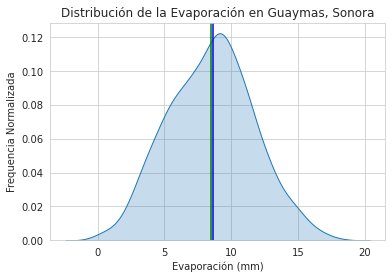

In [27]:
sns.set_style("whitegrid")

sns.kdeplot(df_meteo.Evap, fill=True); #gráfica de la función de densidad de probabilidad.
plt.axvline(Evap_med, color = 'b'); 
plt.axvline(Evap_prom, color = 'g');

plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Evaporación en Guaymas, Sonora')

plt.show()

Para las temperaturas máximas tenemos:

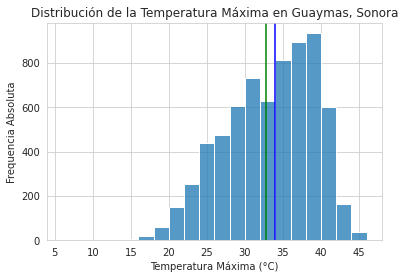

In [28]:
sns.set_style("whitegrid") #Estilo de la gráfica a utilizar, en este caso, whitegrid es: fondo blanco y cuadricula

Tmax_med = df_meteo.Tmax.median() #La mediana de la temperatura máxima
Tmax_prom = df_meteo.Tmax.mean() #El promedio de la temperatura máxima

sns.histplot(data=df_meteo, x='Tmax', bins=20); #Este comando es para los histogramas, tenemos el dataframe, y la columna que usará el eje x

plt.axvline(x = Tmax_med, color = 'b', label = 'm') #Aquí estamos haciendo una línea vertical para el valor de la mediana
plt.axvline(x = Tmax_prom, color = 'g', label = 'x') #Aquí otra para el valor promedio

plt.xlabel('Temperatura Máxima (°C)') #Etiquetando al eje x
plt.ylabel('Frequencia Absoluta') #Etiquetando al eje y
plt.title('Distribución de la Temperatura Máxima en Guaymas, Sonora') #Titular

plt.show() #Ploteo

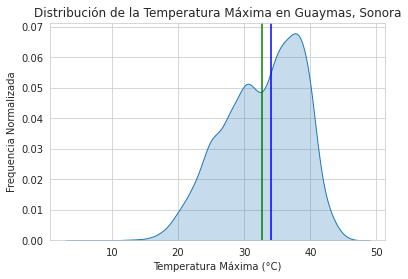

In [29]:
sns.set_style("whitegrid")

sns.kdeplot(df_meteo.Tmax, fill=True); #gráfica de la función de densidad de probabilidad.
plt.axvline(Tmax_med, color = 'b'); 
plt.axvline(Tmax_prom, color = 'g');

plt.xlabel('Temperatura Máxima (°C)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Guaymas, Sonora')

plt.show()

Para la temperatura mínima:

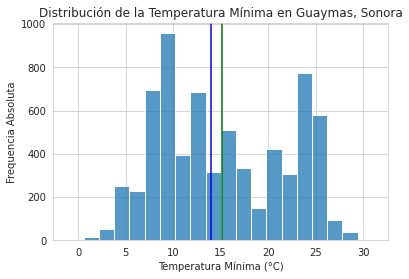

In [30]:
sns.set_style("whitegrid") #Estilo de la gráfica a utilizar, en este caso, whitegrid es: fondo blanco y cuadricula

Tmin_med = df_meteo.Tmin.median() #La mediana de la temperatura minima
Tmin_prom = df_meteo.Tmin.mean() #El promedio de la temperatura minima

sns.histplot(data=df_meteo, x='Tmin', bins=20); #Este comando es para los histogramas, tenemos el dataframe, y la columna que usará el eje x

plt.axvline(x = Tmin_med, color = 'b', label = 'm') #Aquí estamos haciendo una línea vertical para el valor de la mediana
plt.axvline(x = Tmin_prom, color = 'g', label = 'x') #Aquí otra para el valor promedio

plt.xlabel('Temperatura Mínima (°C)') #Etiquetando al eje x
plt.ylabel('Frequencia Absoluta') #Etiquetando al eje y
plt.title('Distribución de la Temperatura Mínima en Guaymas, Sonora') #Titular

plt.show() #Ploteo

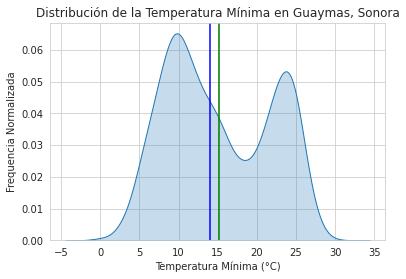

In [31]:
sns.set_style("whitegrid")

sns.kdeplot(df_meteo.Tmin, fill=True); #gráfica de la función de densidad de probabilidad.
plt.axvline(Tmin_med, color = 'b'); 
plt.axvline(Tmin_prom, color = 'g');

plt.xlabel('Temperatura Mínima (°C)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en Guaymas, Sonora')

plt.show()

**Actividad 3:** Crear las gráficas de cajas (Boxplot) para la Evaporación, Temperaturas Máxima y Mínima (Función: sns.boxplot())

Para la evaporación tenemos:

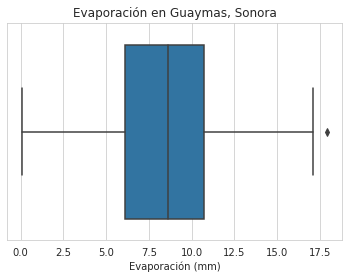

In [32]:
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Evap, data=df_meteo, orient='h').set(xlabel='Evaporación (mm)',  # Gráfica de Cajas (BoxPlots) utilizando la biblioteca Seaborn
                                                     title='Evaporación en Guaymas, Sonora');

Para la temperatura máxima tenemos:

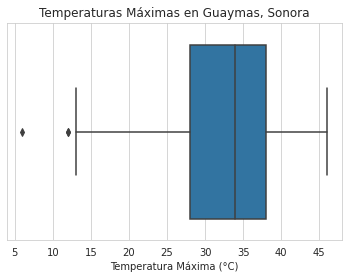

In [33]:
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Tmax, data=df_meteo, orient='h').set(xlabel='Temperatura Máxima (°C)',  # Gráfica de Cajas (BoxPlots) utilizando la biblioteca Seaborn
                                                     title='Temperaturas Máximas en Guaymas, Sonora');

Para la temperatura mínima tenemos:

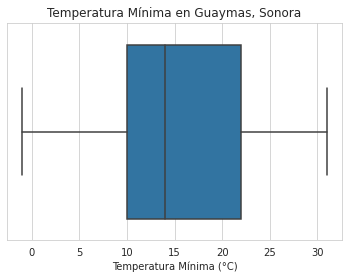

In [34]:
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo.Tmin, data=df_meteo, orient='h').set(xlabel='Temperatura Mínima (°C)',  # Gráfica de Cajas (BoxPlots) utilizando la biblioteca Seaborn
                                                     title='Temperatura Mínima en Guaymas, Sonora');

**Actividad 4:** Produzca las gráficas de barras para la Precipitación agrupado por Años y después por meses (Función: sns.barplot())

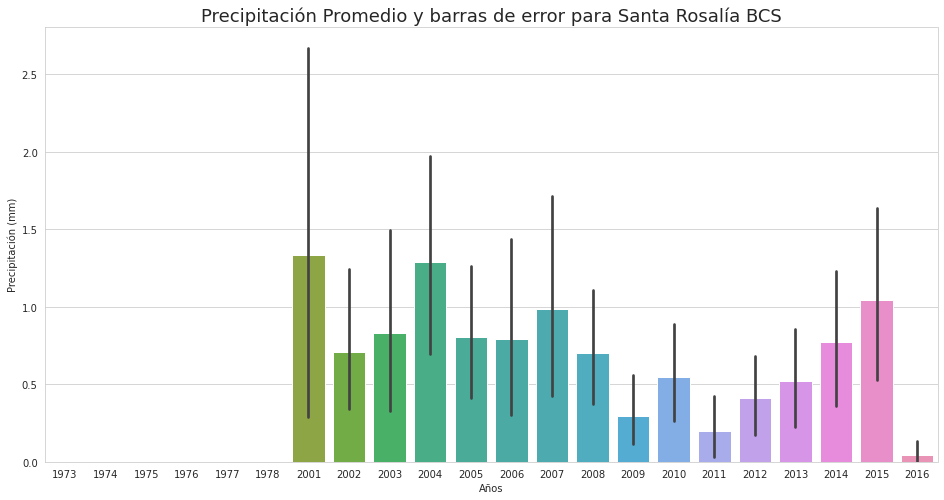

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))  #Tamaño de la gráfica

g=sns.barplot(x='Año', y='Precipit', data=df_meteo); #Graficaremos los datos por año

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Guaymas, Sonora', fontsize=18)

plt.show()

aquí apreciamos que los primeros años se matienen en cero, debido a que en los datos capturados se tienen puros ceros, quizá no hubo mediciones y sólo se rellenaron espacios.

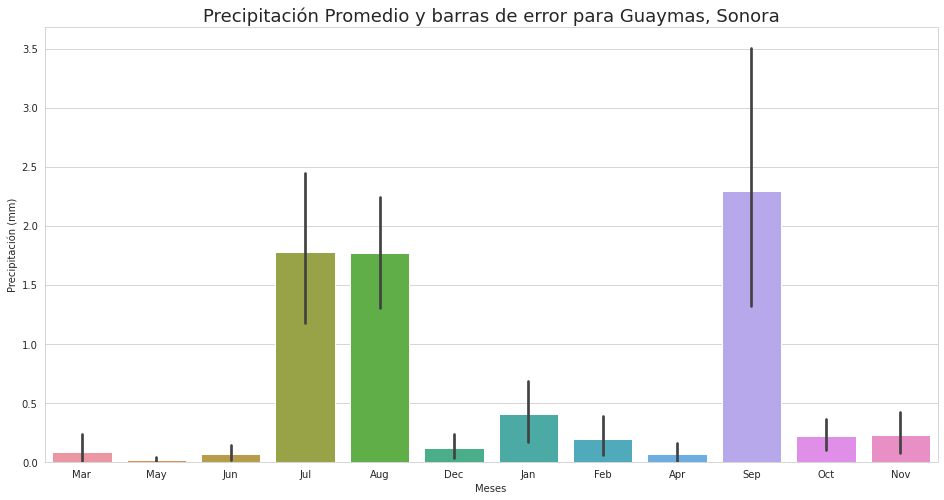

In [38]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))  #Tamaño de la gráfica

g=sns.barplot(x='Mes', y='Precipit', data=df_meteo); #Graficaremos los datos por mes

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Guaymas, Sonora', fontsize=18)

plt.show()

**Actividad 5:** Por favor cree una colección de los últimos 30 años de datos, utilizando condiciones de filtrado por un rango de años. Crear las gráficas de línea de la Precipitación, Temperaturas Máxima y Mínima como funciones del tiempo (Últimos 30 Años). (Función: sns.lineplot())

Para la precipitación tenemos (en este punto de la actividad me di cuenta que mis datos se saltaron muchos años, siendo que no hay datos capturados en el periodo 1978-2001):

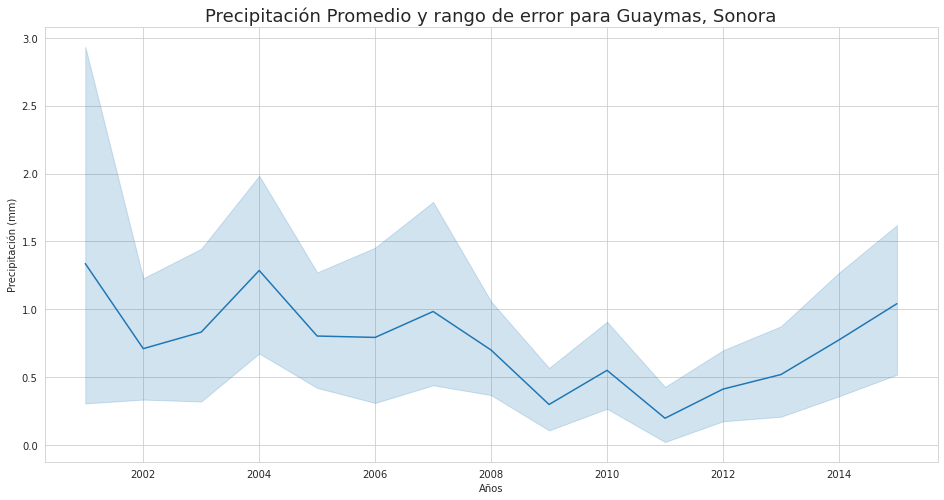

In [39]:
# Seleccionaremos los últimos 30 años de datos 1986-2016
df_30 = df_meteo[(df_meteo['Año'] >= 1986) & (df_meteo['Año'] < 2016)]

sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Precipit', data=df_30); #Gráfica de línea a través del tiempo}

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Guaymas, Sonora', fontsize=18)

plt.show()

Para la temperatura máxima tenemos:

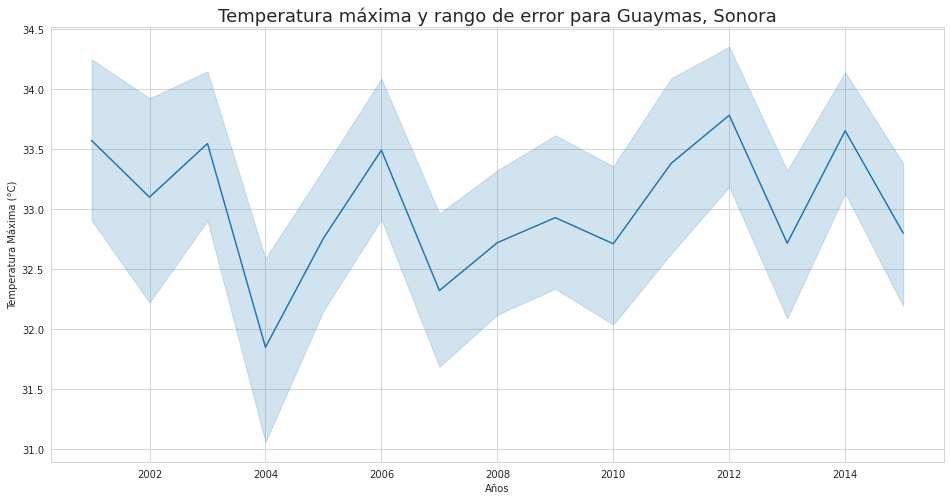

In [40]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Tmax', data=df_30); #Gráfica de línea a través del tiempo

plt.xlabel('Años')
plt.ylabel('Temperatura Máxima (°C)')
plt.title('Temperatura máxima y rango de error para Guaymas, Sonora', fontsize=18)

plt.show()

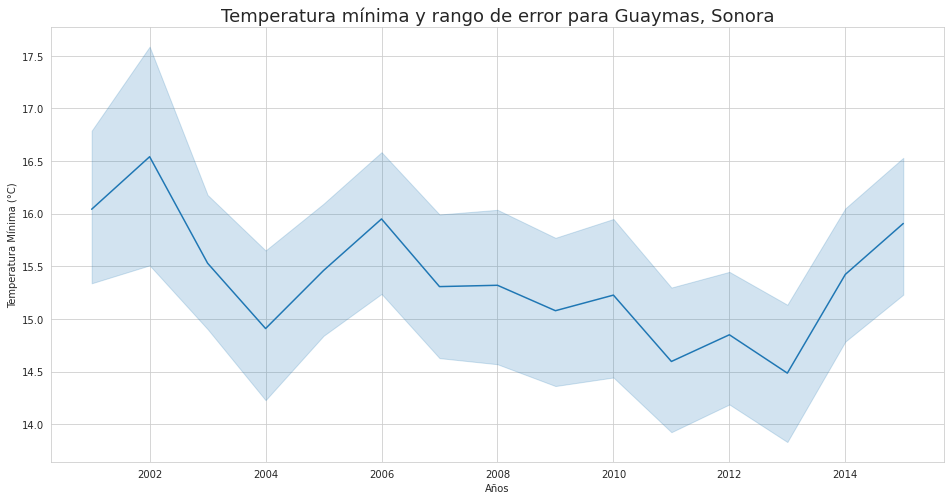

In [41]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Tmin', data=df_30); #Gráfica de línea a través del tiempo

plt.xlabel('Años')
plt.ylabel('Temperatura Mínima (°C)')
plt.title('Temperatura mínima y rango de error para Guaymas, Sonora', fontsize=18)

plt.show()

Comparación de ambas temperaturas

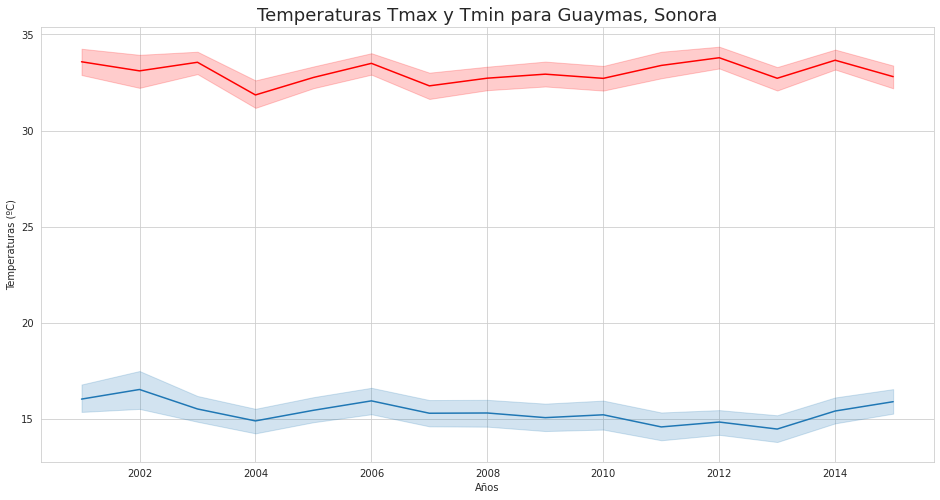

In [42]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='Tmax', data=df_30, color='r');
sns.lineplot(x='Año', y='Tmin', data=df_30);

plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para Guaymas, Sonora', fontsize=18)

plt.show()

**Actividad 6:**  Con el conjunto de 30 años de datos, produzca diagramas de cajas (Función: sns.boxplot()) para observar la variabilidad de las Temperaturas (Max y Tmin) y la Evaporación agrupados por Mes.

Para la temperatura máxima:

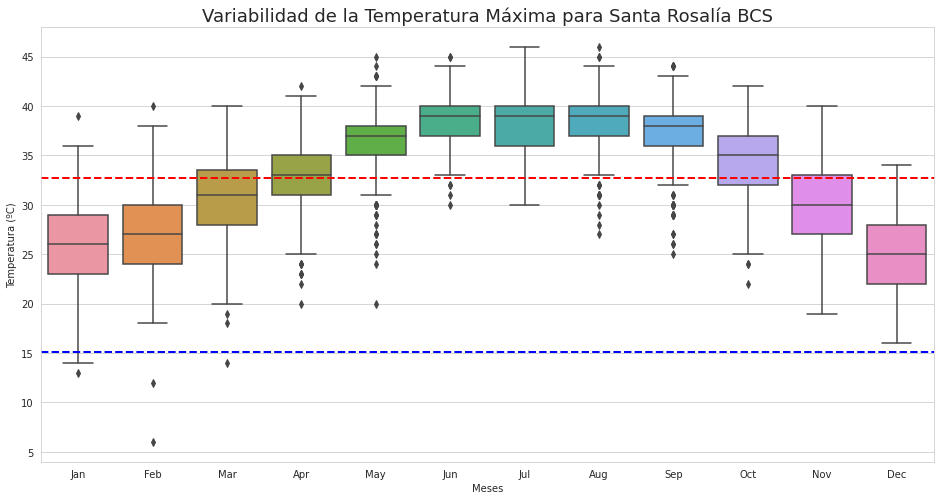

mean(Tmax) =  32.75272807274861
mean(Tmin) =  15.113769817968292
Diff Tmax_ave-Tmin_ave =  17.63895825478032


In [44]:
# Gráfica de Temepraturas Máximas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmax', data=df_30);
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para Santa Rosalía BCS', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

Para la temperatura mínima:

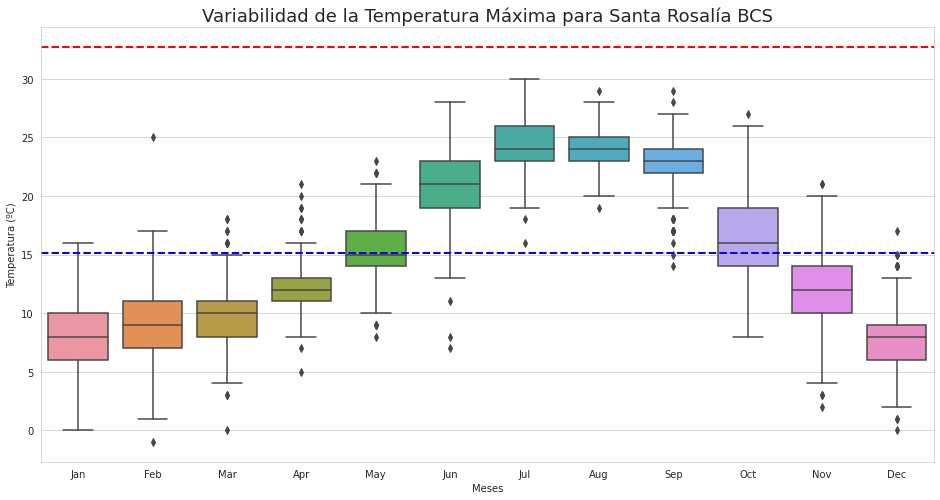

mean(Tmax) =  32.75272807274861
mean(Tmin) =  15.113769817968292
Diff Tmax_ave-Tmin_ave =  17.63895825478032


In [46]:
# Gráfica de Temepraturas Mínimas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo.Tmax.mean()
Tmin_ave = df_meteo.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmin', data=df_30);
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para Santa Rosalía BCS', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

Para la evaporación:

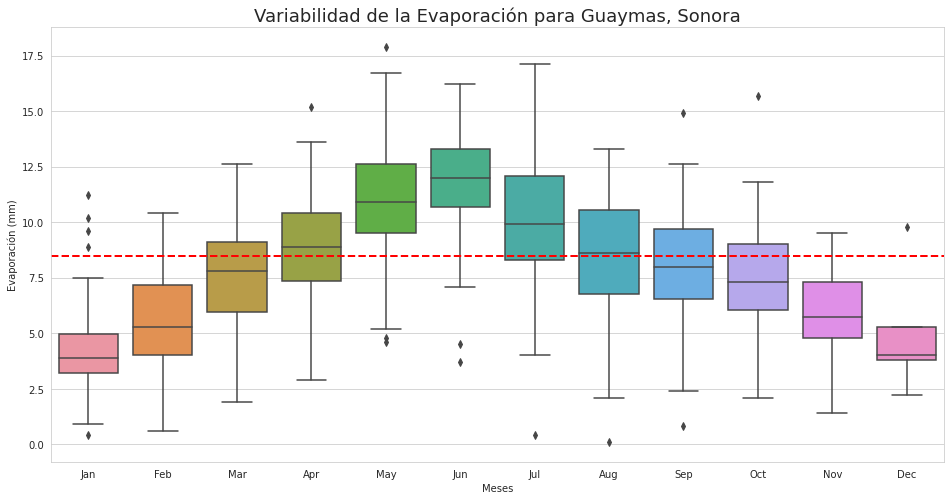

mean(Evap) =  8.4775212636695


In [48]:
# Gráfica de Temepraturas Máximas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Evaporación
Evap_ave = df_meteo.Evap.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Evap', data=df_30);
# Linea de Evap promedio 
plt.axhline(Evap_ave, color = 'r', linestyle='--', linewidth=2);

plt.xlabel('Meses')
plt.ylabel('Evaporación (mm)')
plt.title('Variabilidad de la Evaporación para Guaymas, Sonora', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Evap) = ', Evap_ave)